# Classification of the Angle of the Photos of Cars

In [125]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [126]:
from fastai import *
from fastai.vision import *
from IPython.display import clear_output

In [136]:
path = Path("Car_Angle")

In [137]:
path.mkdir(exist_ok=True)

In [138]:
data = pd.read_csv(path/"Cars_prediction (1).csv", index_col=False, usecols=['labeled_class','image_url'])

In [139]:
data.head()

,labeled_class,image_url
0,Side,https://lh3.googleusercontent.com/QSAoQY5AWz9R...
1,Front,https://lh3.googleusercontent.com/lB5NUTBbGeyp...
2,Side,https://lh3.googleusercontent.com/ptpahT_hrIhQ...
3,Front-Side,https://lh3.googleusercontent.com/Wc9K0fLAmRO5...
4,Front-Side,https://lh3.googleusercontent.com/jsxe2nGW6rMT...


We would like to separate image files into corresponding class folder, according to the convention of ImageNet.

In [140]:
back = data[data.labeled_class == 'Back']

In [141]:
back.head()

,labeled_class,image_url
5,Back,https://lh3.googleusercontent.com/ismBbwi5-0b1...
18,Back,https://lh3.googleusercontent.com/FzE6tt--mBqP...
20,Back,https://lh3.googleusercontent.com/uX-Ds5XR5Q_c...
41,Back,https://lh3.googleusercontent.com/zPbPZEPZwkuS...
44,Back,https://lh3.googleusercontent.com/3NczyYhbgMiD...


It would be appropriate to have the image labeled from 0 to its size. Otherwise, it might leave an impression that the number in between are from missing images.

In [142]:
back.reset_index(drop=True, inplace=True)

In [143]:
back.head()

,labeled_class,image_url
0,Back,https://lh3.googleusercontent.com/ismBbwi5-0b1...
1,Back,https://lh3.googleusercontent.com/FzE6tt--mBqP...
2,Back,https://lh3.googleusercontent.com/uX-Ds5XR5Q_c...
3,Back,https://lh3.googleusercontent.com/zPbPZEPZwkuS...
4,Back,https://lh3.googleusercontent.com/3NczyYhbgMiD...


In [144]:
back = back.assign(file_name = back['labeled_class'] + '_' + back.index.astype(str)) + '.jpg'

In [145]:
back.head()

,labeled_class,image_url,file_name
0,Back.jpg,https://lh3.googleusercontent.com/ismBbwi5-0b1...,Back_0.jpg
1,Back.jpg,https://lh3.googleusercontent.com/FzE6tt--mBqP...,Back_1.jpg
2,Back.jpg,https://lh3.googleusercontent.com/uX-Ds5XR5Q_c...,Back_2.jpg
3,Back.jpg,https://lh3.googleusercontent.com/zPbPZEPZwkuS...,Back_3.jpg
4,Back.jpg,https://lh3.googleusercontent.com/3NczyYhbgMiD...,Back_4.jpg


In [146]:
data_path = path/"car_dataset"

In [147]:
data_path.mkdir(exist_ok=True)

In [93]:
for current_class in data.labeled_class.unique():
    # Create a separate folder for each class
    class_folder = data_path/'train'/current_class
    class_folder.mkdir(exist_ok=True)
    
    # Create a a view of the data containing only rows of the current class
    classView = data[data.labeled_class == current_class]
    
    # Reindex the view from 0 to its length, for the convenience of generating
    # the file_name column
    classView.reset_index(drop=True, inplace=True)
    
    # Create a column representing the file name we will store the image as
    # which will simply be its class name and index
    classView = classView.assign(file_name = classView['labeled_class'] + '_' 
                                 + classView.index.astype(str)) + '.jpg'
    
    # Download the images
    for url, file_name in zip(classView.image_url, classView.file_name):
        dest = class_folder/file_name
        clear_output(wait=True)
        display("Downloading {}".format(dest))
        download_url(url=url, dest=dest, overwrite=True, show_progress=False)

'Downloading car_dataset/Back-Side/Back-Side_51'

In [111]:
tfms = get_transforms()

In [112]:
np.random.seed(2)

In [113]:
path

PosixPath('car_dataset')

In [114]:
data = ImageDataBunch.from_folder(path, valid_pct=0.2, ds_tfms=tfms, size=224).normalize(imagenet_stats)

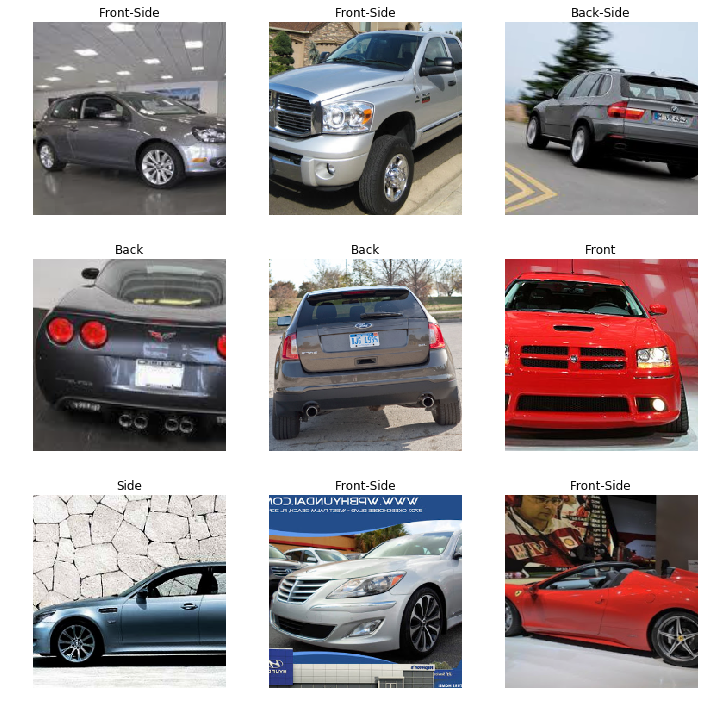

In [118]:
data.show_batch(rows=3, figsize=(10,10))

In [121]:
print(data.classes)
len(data.classes),data.c

['Back', 'Side', 'Back-Side', 'Front-Side', 'Front']


(5, 5)

In [123]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /Users/georgezhang/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [04:17<00:00, 338850.50it/s]


In [124]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate


Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/georgezhang/anaconda3/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/Users/georgezhang/anaconda3/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/Users/georgezhang/anaconda3/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/Users/georgezhang/anaconda3/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
  File "/Users/georgezhang/anaconda3/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/Users/georgezhang/anaconda3/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/Users/georgezhang/anaconda3/lib/python3.6/multiprocessing/connectio

KeyboardInterrupt: 